##구글 드라이브 연동

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/Colab Notebooks/project1_1/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/Colab Notebooks/project1_1/'

Mounted at /gdrive
지역별_신·재생에너지_발전량_2020년.csv	skorea-provinces-geo.json
bio.html				solar.html
fuel.html				TL_SCCO_CTPRVN.json
igcc.html				waste.html
marine.html				water.html
Project1_1.ipynb			wind.html


##한글 사용

In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

##데이터 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn

# 사용자 편의를 위해 Magic 키워드 를 지원 %, %%
# 주피터 노트북의 대화형 시각화 기능을 활성화
%matplotlib inline
# 그래프를 더 높은 해상도로 출력
%config InlineBackend.figure_format = 'retina'

##데이터 불러오기

In [ ]:
df = pd.read_csv(drive_path + '지역별_신·재생에너지_발전량_2020년.csv', encoding='euc-kr')
df.head(10)

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),2020,2020.1,2020.2,2020.3,2020.4,2020.5,...,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484
3,신·재생에너지 총발전량①+② (MWh),자가용,소계,소계,3270157,207652,94380,92700,91328,64683,...,28805,498664,177414,244927,241035,226544,281436,249294,334804,81012
4,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,소계,소계,37161788,304645,281073,217755,517763,309035,...,116209,2912279,4804041,2149373,4495612,6831024,4767309,3660764,2292423,2479305
5,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,사업용,소계,33928372,103329,187877,127530,428146,247636,...,87474,2422095,4626955,1905070,4256124,6605098,4487167,3415779,1958586,2398484
6,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,자가용,소계,3233416,201316,93197,90225,89617,61399,...,28735,490184,177086,244303,239489,225927,280142,244985,333837,80821
7,신·재생에너지 총발전량①+② (MWh),② 신에너지 합,소계,소계,5899723,341376,184406,7978,953567,3284,...,39734,1232435,49234,624,2835565,8625,168040,32155,19637,191
8,신·재생에너지 총발전량①+② (MWh),② 신에너지 합,사업용,소계,5862982,335040,183222,5502,951857,-,...,39664,1223956,48906,-,2834019,8008,166746,27846,18669,-
9,신·재생에너지 총발전량①+② (MWh),② 신에너지 합,자가용,소계,36742,6336,1184,2476,1711,3284,...,70,8479,328,624,1547,617,1294,4309,967,191


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   에너지원별(1)  73 non-null     object
 1   에너지원별(2)  73 non-null     object
 2   에너지원별(3)  73 non-null     object
 3   에너지원별(4)  73 non-null     object
 4   2020      73 non-null     object
 5   2020.1    73 non-null     object
 6   2020.2    73 non-null     object
 7   2020.3    73 non-null     object
 8   2020.4    73 non-null     object
 9   2020.5    73 non-null     object
 10  2020.6    73 non-null     object
 11  2020.7    73 non-null     object
 12  2020.8    73 non-null     object
 13  2020.9    73 non-null     object
 14  2020.10   73 non-null     object
 15  2020.11   73 non-null     object
 16  2020.12   73 non-null     object
 17  2020.13   73 non-null     object
 18  2020.14   73 non-null     object
 19  2020.15   73 non-null     object
 20  2020.16   73 non-null     object
 21  2020.17   73 non-n

##Column 이름을 아래 행 값으로 변환하기

In [ ]:
df.columns

Index(['에너지원별(1)', '에너지원별(2)', '에너지원별(3)', '에너지원별(4)', '2020', '2020.1',
       '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7', '2020.8',
       '2020.9', '2020.10', '2020.11', '2020.12', '2020.13', '2020.14',
       '2020.15', '2020.16', '2020.17'],
      dtype='object')

In [ ]:
# 첫번째 행을 리스트로 변환
column_names = df.iloc[0].values.tolist()
column_names

['에너지원별(1)',
 '에너지원별(2)',
 '에너지원별(3)',
 '에너지원별(4)',
 '전국',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [ ]:
# 컬럼명을 첫번째 행으로 바꾸기
df.columns = column_names
df

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484
3,신·재생에너지 총발전량①+② (MWh),자가용,소계,소계,3270157,207652,94380,92700,91328,64683,...,28805,498664,177414,244927,241035,226544,281436,249294,334804,81012
4,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,소계,소계,37161788,304645,281073,217755,517763,309035,...,116209,2912279,4804041,2149373,4495612,6831024,4767309,3660764,2292423,2479305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,② 신에너지,연료전지 (MWh),소계,소계,3522350,341376,184406,7978,953567,3284,...,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,② 신에너지,연료전지 (MWh),사업용,소계,3485608,335040,183222,5502,951857,-,...,39664,1223956,48906,-,456645,8008,166746,27846,18669,-
70,② 신에너지,연료전지 (MWh),자가용,소계,36742,6336,1184,2476,1711,3284,...,70,8479,328,624,1547,617,1294,4309,967,191
71,② 신에너지,IGCC (MWh),소계,소계,2377374,-,-,-,-,-,...,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 윗부분 날리기
df2 = df.drop(range(1,11))
df2

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,① 재생에너지,태양광 (MWh),소계,소계,19297854,227866,227442,169862,188044,290921,...,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
12,① 재생에너지,태양광 (MWh),사업용,소계,16452484,43583,136752,99896,99094,229524,...,56631,977658,1233622,875883,2244663,3020066,3693137,2083240,1137923,413516
13,① 재생에너지,태양광 (MWh),자가용,소계,2845369,184283,90690,69966,88950,61397,...,28735,446739,174541,233992,234284,220426,276625,232880,318776,76113
14,① 재생에너지,풍력 (MWh),소계,소계,3149798,201,253,26,52828,2,...,-,5625,782254,16,2986,131205,576229,944024,74178,578059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,② 신에너지,연료전지 (MWh),소계,소계,3522350,341376,184406,7978,953567,3284,...,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,② 신에너지,연료전지 (MWh),사업용,소계,3485608,335040,183222,5502,951857,-,...,39664,1223956,48906,-,456645,8008,166746,27846,18669,-
70,② 신에너지,연료전지 (MWh),자가용,소계,36742,6336,1184,2476,1711,3284,...,70,8479,328,624,1547,617,1294,4309,967,191
71,② 신에너지,IGCC (MWh),소계,소계,2377374,-,-,-,-,-,...,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 에너지원별(3)의 값이 '소계'인 것만 사용할 것 (나머지 컬럼 날리기)
df3 = df2.drop(['에너지원별(1)', '에너지원별(4)'], axis=1 )

# 에너지원별(2)를 에너지원별로 이름 바꾸기
df4 = df3.rename(columns={'에너지원별(2)':'에너지원별'})
df4

,에너지원별,에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너지원별(2),에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광 (MWh),소계,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
12,태양광 (MWh),사업용,16452484,43583,136752,99896,99094,229524,36864,70432,56631,977658,1233622,875883,2244663,3020066,3693137,2083240,1137923,413516
13,태양광 (MWh),자가용,2845369,184283,90690,69966,88950,61397,53729,53242,28735,446739,174541,233992,234284,220426,276625,232880,318776,76113
14,풍력 (MWh),소계,3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,연료전지 (MWh),소계,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,연료전지 (MWh),사업용,3485608,335040,183222,5502,951857,-,7799,11747,39664,1223956,48906,-,456645,8008,166746,27846,18669,-
70,연료전지 (MWh),자가용,36742,6336,1184,2476,1711,3284,1085,2240,70,8479,328,624,1547,617,1294,4309,967,191
71,IGCC (MWh),소계,2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 에저지원별 컬럼의 항목들의 뒷부분(단위) 날리기

a = df4['에너지원별'].tolist()
b=[]
for x in a:
  b.append(x[:-6])
df4['에너지원별'] = b
df4

,에너지원별,에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너,에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광,소계,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
12,태양광,사업용,16452484,43583,136752,99896,99094,229524,36864,70432,56631,977658,1233622,875883,2244663,3020066,3693137,2083240,1137923,413516
13,태양광,자가용,2845369,184283,90690,69966,88950,61397,53729,53242,28735,446739,174541,233992,234284,220426,276625,232880,318776,76113
14,풍력,소계,3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,연료전지,소계,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,연료전지,사업용,3485608,335040,183222,5502,951857,-,7799,11747,39664,1223956,48906,-,456645,8008,166746,27846,18669,-
70,연료전지,자가용,36742,6336,1184,2476,1711,3284,1085,2240,70,8479,328,624,1547,617,1294,4309,967,191
71,IGCC,소계,2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# -로 표시된 빈 값을 문자 0으로 바꾸기

df4[df4 == '-'] = '0'
df4

,에너지원별,에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너,에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광,소계,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
12,태양광,사업용,16452484,43583,136752,99896,99094,229524,36864,70432,56631,977658,1233622,875883,2244663,3020066,3693137,2083240,1137923,413516
13,태양광,자가용,2845369,184283,90690,69966,88950,61397,53729,53242,28735,446739,174541,233992,234284,220426,276625,232880,318776,76113
14,풍력,소계,3149798,201,253,26,52828,2,398,1514,0,5625,782254,16,2986,131205,576229,944024,74178,578059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,연료전지,소계,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,연료전지,사업용,3485608,335040,183222,5502,951857,0,7799,11747,39664,1223956,48906,0,456645,8008,166746,27846,18669,0
70,연료전지,자가용,36742,6336,1184,2476,1711,3284,1085,2240,70,8479,328,624,1547,617,1294,4309,967,191
71,IGCC,소계,2377374,0,0,0,0,0,0,0,0,0,0,0,2377374,0,0,0,0,0


##에너지원별(3)의 항목이 '소계'인 경우가 아닌 행 날리기

In [ ]:
# 인덱스를 찍어본다
df4['에너지원별(3)'].index

Int64Index([ 0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
            27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
            44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
            61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
           dtype='int64')

In [ ]:
# 에너지원별(3)의 항목이 '소계'인 인덱스 모음 (날릴 인덱스)
list_del = df4.index[df4['에너지원별(3)'] != '소계']

# 날릴 인덱스 날리기
for index in list_del:
  df4 = df4.drop(index, axis=0)
df4

,에너지원별,에너지원별(3),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광,소계,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
14,풍력,소계,3149798,201,253,26,52828,2,398,1514,0,5625,782254,16,2986,131205,576229,944024,74178,578059
17,수력,소계,3879383,1112,93,12951,39579,7795,241,1457,0,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
20,해양,소계,457263,0,0,0,0,0,0,0,0,457257,0,0,0,0,0,0,0,5.6
22,바이오,소계,9938354,29554,9827,29663,228842,4779,0,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
49,폐기물,소계,439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
68,연료전지,소계,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
71,IGCC,소계,2377374,0,0,0,0,0,0,0,0,0,0,0,2377374,0,0,0,0,0


In [ ]:
# 이젠 굿바이

df5 = df4.drop(['에너지원별(3)'], axis=1)
df5

,에너지원별,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광,19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
14,풍력,3149798,201,253,26,52828,2,398,1514,0,5625,782254,16,2986,131205,576229,944024,74178,578059
17,수력,3879383,1112,93,12951,39579,7795,241,1457,0,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
20,해양,457263,0,0,0,0,0,0,0,0,457257,0,0,0,0,0,0,0,5.6
22,바이오,9938354,29554,9827,29663,228842,4779,0,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
49,폐기물,439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
68,연료전지,3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
71,IGCC,2377374,0,0,0,0,0,0,0,0,0,0,0,2377374,0,0,0,0,0


In [ ]:
# 타입이 모두 문자열이다. astype으로 숫자형으로 고치기
# int형이 아닌 것이 하나 있다. 그래서 float형으로 형변환

df5.iloc[:, 1:] = df5.iloc[:, 1:].astype('float')
df5

,에너지원별,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
11,태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
14,풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
17,수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
20,해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
22,바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
49,폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
68,연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
71,IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0


##에너지원별 비중 구하기 -> 퍼센트로

In [ ]:
# 일단 sum을 찍어본다
df5['전국'].sum()

43061513.0

In [ ]:
# 퍼센트 열을 추가하고 에너지원별 퍼센트를 구해 값을 넣어준다

df5['퍼센트'] = df5['전국'] / (df5['전국'].sum()) * 100
df5

,에너지원별,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,퍼센트
11,태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0,44.814621
14,풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0,7.314648
17,수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0,9.008933
20,해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6,1.061883
22,바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0,23.079435
49,폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0,1.01979
68,연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0,8.17981
71,IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0,5.520879


In [ ]:
# 나중에...(min_max 알고리즘으로 지도에 표현)
def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin)*(newMax - newMin) / (oldMax - oldMin) + newMin



##인덱스 새로 부여

In [ ]:
# np를 이용한다
df5.index = np.arange(len(df5))
df5

,에너지원별,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,퍼센트
0,태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0,44.814621
1,풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0,7.314648
2,수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0,9.008933
3,해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6,1.061883
4,바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0,23.079435
5,폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0,1.01979
6,연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0,8.17981
7,IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0,5.520879


##에너지원별을 인덱스로 만들자

In [ ]:
df6 = df5.set_index('에너지원별')
df6

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,퍼센트
에너지원별,,,,,,,,,,,,,,,,,,,
태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0,44.814621
풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0,7.314648
수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0,9.008933
해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6,1.061883
바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0,23.079435
폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0,1.01979
연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0,8.17981
IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0,5.520879


##파이차트로 만들기 좋은 것

In [ ]:
df6['서울']

에너지원별
태양광     227866.0
풍력         201.0
수력        1112.0
해양           0.0
바이오      29554.0
폐기물      45912.0
연료전지    341376.0
IGCC         0.0
Name: 서울, dtype: object

In [ ]:
# 서울
df_seo = df6['서울'] / (df6['서울'].sum()) * 100
df_seo

에너지원별
태양광     35.272228
풍력       0.031114
수력       0.172131
해양            0.0
바이오      4.574774
폐기물       7.10689
연료전지    52.842864
IGCC          0.0
Name: 서울, dtype: object

In [ ]:
# 부산
df_bus = df6['부산'] / (df6['부산'].sum()) * 100
df_bus

에너지원별
태양광     48.861925
풍력       0.054353
수력       0.019979
해양            0.0
바이오      2.111159
폐기물      9.336189
연료전지    39.616395
IGCC          0.0
Name: 부산, dtype: object

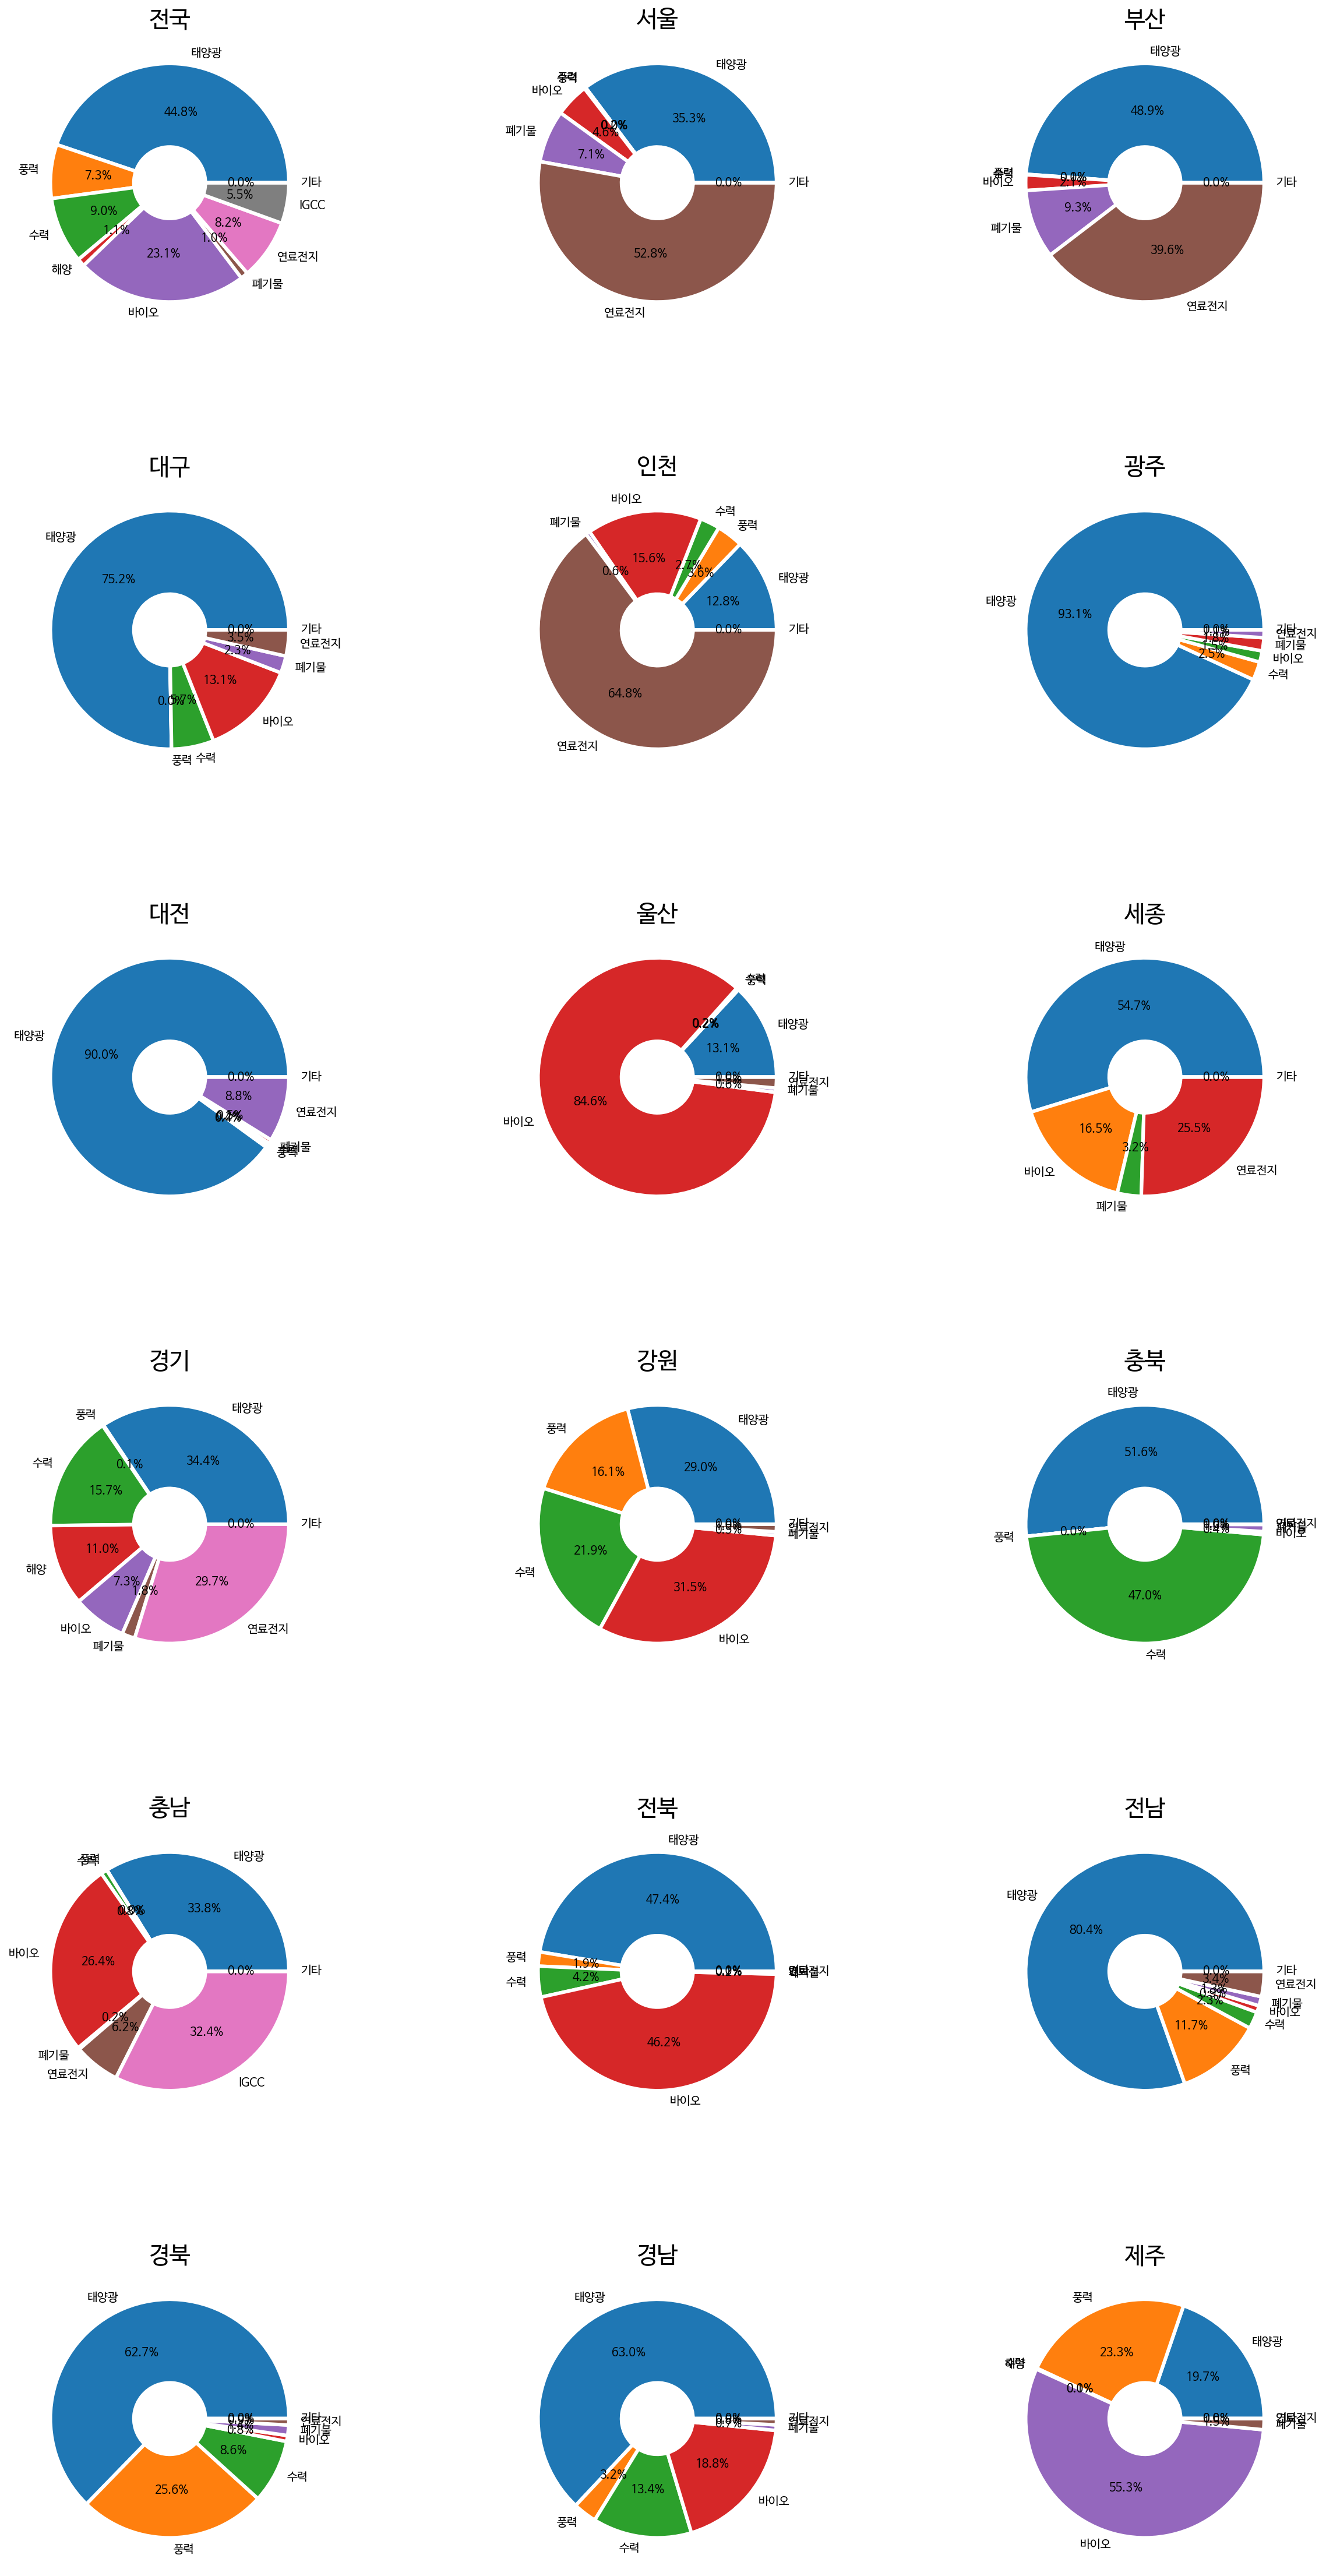

In [ ]:
f, axes = plt.subplots(6, 3)

f.set_size_inches((20, 40))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
idx = 0
for j in range(6):
    for k in range(3):
        # 1퍼센트 미만은 기타로 처리하자.
        city_name = list(df6.columns)[idx]
        gra_temp = df6[f'{city_name}'][df6[f'{city_name}'] <= 2].sum()
        gra = df6[f'{city_name}'][df6[f'{city_name}'] > 2]   
        gra.loc['기타'] = gra_temp

        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
        axes[j, k].pie(gra, labels=gra.index, autopct='%.1f%%', wedgeprops=wedgeprops)
        axes[j, k].set_title(city_name, fontsize=20)
        idx += 1


plt.show()

In [ ]:
df6.columns

Index(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주', '퍼센트'],
      dtype='object')

In [ ]:
# 귀찮으니 for문

for city in df6.columns:
  print(df6[city] / (df6[city].sum()) * 100)
  print('-----------------------')


에너지원별
태양광     44.814621
풍력       7.314648
수력       9.008933
해양       1.061883
바이오     23.079435
폐기물       1.01979
연료전지      8.17981
IGCC     5.520879
Name: 전국, dtype: object
-----------------------
에너지원별
태양광     35.272228
풍력       0.031114
수력       0.172131
해양            0.0
바이오      4.574774
폐기물       7.10689
연료전지    52.842864
IGCC          0.0
Name: 서울, dtype: object
-----------------------
에너지원별
태양광     48.861925
풍력       0.054353
수력       0.019979
해양            0.0
바이오      2.111159
폐기물      9.336189
연료전지    39.616395
IGCC          0.0
Name: 부산, dtype: object
-----------------------
에너지원별
태양광     75.249411
풍력       0.011518
수력       5.737335
해양            0.0
바이오     13.140804
폐기물      2.326653
연료전지      3.53428
IGCC          0.0
Name: 대구, dtype: object
-----------------------
에너지원별
태양광     12.780545
풍력       3.590493
수력       2.690015
해양            0.0
바이오     15.553411
폐기물       0.57567
연료전지    64.809866
IGCC          0.0
Name: 인천, dtype: object
-----------------------
에너지원별
태양광 

##지도 시각화

In [ ]:
df7 = df6.T.drop(['전국','퍼센트']).sort_index()
df7

에너지원별,태양광,풍력,수력,해양,바이오,폐기물,연료전지,IGCC
강원,1408163.0,782254.0,1062271.0,0.0,1526563.0,24791.0,49234.0,0.0
경기,1424397.0,5625.0,649895.0,457257.0,302034.0,73072.0,1232435.0,0.0
경남,1456699.0,74178.0,310046.0,0.0,434237.0,17263.0,19637.0,0.0
경북,2316120.0,944024.0,319014.0,0.0,29698.0,51907.0,32155.0,0.0
광주,290921.0,2.0,7795.0,0.0,4779.0,5539.0,3284.0,0.0
대구,169862.0,26.0,12951.0,0.0,29663.0,5252.0,7978.0,0.0
대전,90593.0,398.0,241.0,0.0,0.0,533.0,8884.0,0.0
부산,227442.0,253.0,93.0,0.0,9827.0,43458.0,184406.0,0.0
서울,227866.0,201.0,1112.0,0.0,29554.0,45912.0,341376.0,0.0
세종,85366.0,0.0,0.0,0.0,25790.0,5053.0,39734.0,0.0


In [ ]:
import folium
import json

from folium import plugins

latitude, longitude = 35.9078, 127.7669 #대한민국 위도, 경도
s_korea = folium.Map(location = [latitude, longitude], zoom_start=7, tiles='cartodbpositron')

with open(drive_path +'TL_SCCO_CTPRVN.json' , mode='rt', encoding='utf-8') as f:
   geo = json.loads(f.read())
   f.close()
folium.GeoJson(geo).add_to(s_korea)

list_region =[]
for i in range(len(geo['features'])):
  list_region.append(geo['features'][i]['properties']['CTP_KOR_NM'])




s_list = df7['IGCC']
sample_data = dict(zip(list_region, s_list))

s_korea.choropleth(geo_data=geo,
          data=sample_data, 
          fill_color='YlOrRd', # 색상 변경도 가능하다
          fill_opacity=0.5,
          line_opacity=0.2,
          key_on='properties.CTP_KOR_NM',
          legend_name='IGCC'
          )
s_korea.save(drive_path + 'igcc.html')
s_korea

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
